# Contributors
Tan Yuan Jie <br>
Lean Wei Liang <br>
Seow Kai Sheng

In [1]:
group_leader_id=1802629  # Insert your ID number here as a 7-digit integer
member_1_id=1802312  # Insert your ID number here as a 7-digit integer
member_2_id=1802918  # Insert your ID number here as a 7-digit integer

# If your group has 2 members, use the 2nd member's ID twice (lines 2 and 3)

def check_id_number(id_number):
    if isinstance(id_number, str):
        raise TypeError("Please provide the digits of your ID number only.")
    if len(str(id_number)) != 7:
        raise ValueError("Please provide the seven (7) digits of your ID number.")
    return

check_id_number(group_leader_id)
check_id_number(member_1_id)
check_id_number(member_2_id)

import numpy as np
import random
from copy import deepcopy
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image

def generate_target_image_matrix(filepath):
    '''
    Open the UTAR logo file (must be 300-by-150 in pixels) at `filepath` and
    chop it into 9 sub-images of equal size (leaving top-left empty). These
    sub-images are saved into a list of lists (representing 3-by-3 matrix).
    
    Note - Numpy nd-arrays aren't used because they cannot hold Images as
    elements.
    '''
    im = Image.open(filepath)
    images = np.zeros(shape=(3, 3))
    images = images.tolist()
    for r in range(3):
        for c in range(3):
            if r+c > 0:  # The top-left box is left empty to allow moving
                box = (c*100, r*50, (c+1)*100, (r+1)*50)
                images[r][c] = im.crop(box)
    return images

def display_single_image(images):
    '''
    Take the 3-by-3 'matrix' of images and display it as one image (with a
    2-pixel gap to indicate where the sub-images are). Does not return any
    value.
    
    Note - By definition for this puzzle there must always be an empty
    element in the 3-by-3 matrix.
    '''
    im = Image.new(mode='RGB', size=(304, 154), color=(255,255,255))
    for r in range(3):
        for c in range(3):
            if images[r][c]:  # Check if there's a sub-image here
                box = (c*102, r*52, c*102+100, r*52+50)
                im.paste(images[r][c], box)
    display(im)

def shift_image_matrix_once(images, loc=None):
    '''
    Take the 3-by-3 'matrix' of images and do one movement, returning
    the resulting 3-by-3 'matrix' of images. If `loc` is None (default)
    then this randomly chooses a valid movement.
    '''
    for r in range(3):
        for c in range(3):
            if not images[r][c]:  # Found the empty slot!
                empty_loc = (r, c)
                target_loc = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
    # target_loc lists the locations which are valid sub-images to be
    # moved into this empty slot (so -1 and 3 aren't valid coordinates)
    target_loc = [(r, c) for (r, c) in target_loc
                 if r > -1 and c > -1 and r < 3 and c < 3]
    if loc == None:  # Default behaviour, shift a random piece
        target_loc = random.choice(target_loc)
    else:  # Shift a given target to the empty location
        if loc in target_loc:
            target_loc = loc
        else:  # If an invalid loc is specified, return an error
            raise ValueError("The location '{}' is not adjacent to the empty location '{}'"
                            .format(loc, empty_loc))
    rO, cO = empty_loc
    rT, cT = target_loc
    images[rO][cO], images[rT][cT] = images[rT][cT], images[rO][cO]
    return images

def shuffle_image_matrix_n_times(images, n):
    '''
    Take the 3-by-3 'matrix' of images and a number n, which is the number of times
    to shuffle the puzzle. Returns the shuffled puzzle.
    '''
    for i in range(n):
        images = shift_image_matrix_once(images)
    return images

def apply_solution_to_image_matrix(images, solution):
    '''
    Apply a solution (formulated as a list of locations to move) to a 'matrix' of
    images. If the solution is correct, the resulting/returned 'matrix' should be
    identical to the target 'matrix', showing the UTAR logo.
    '''
    images = deepcopy(images)  # To allow multiple calls to this function
    for loc in solution:
        images = shift_image_matrix_once(images, loc=loc)
    return images

def pick_uninformed_search_method():
    l = ['Breadth-first Search',
         'Depth-first Search',
         'Bidirectional Search',
         'Uniform-cost Search',
         'Iterative Deepening']
    random.shuffle(l)
    return l[0], l[1]

'The target image'

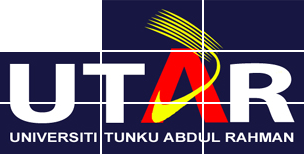

'Your randomly generated starting point'

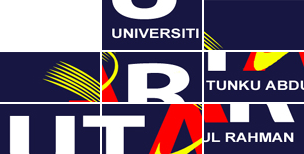

"Your randomly generated uninformed search methods are 'Uniform-cost Search' and 'Breadth-first Search'"

In [2]:
random.seed(group_leader_id)
images = generate_target_image_matrix('UTARLogo.png')
display("The target image")
display_single_image(images)
display("Your randomly generated starting point")
starting_point = shuffle_image_matrix_n_times(images, 1000)  # Do not change this number
display_single_image(starting_point)
random.seed(member_1_id*member_2_id)
display("Your randomly generated uninformed search methods are '{}' and '{}'".format(*pick_uninformed_search_method()))

'The result after applying the provided solution list'

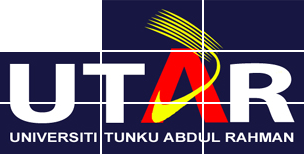

In [3]:
# When you have a solution, you can test it as below. The solution list is
# a consecutive list of positions which need to be shifted to the current empty
# slot. The solution shown below is the solution for the puzzle generated by
# the random seed 1234567.

# Do note that this cell and the student ID in cell 2 are the ONLY cells you are
# allowed to edit. Malicious edits for the purpose of creating a fake solution
# will be treated as disciplinary offenses.
solution = [(1,0),(1,1),(1,2),(2,2),(2,1),(1,1),(1,0),(2,0),(2,1),(2,2),(1,2),(1,1),(0,1),(0,0),(1,0),(1,1),(2,1),(2,0),(1,0),(0,0)]
display('The result after applying the provided solution list')
display_single_image(apply_solution_to_image_matrix(starting_point, solution))

# Full Solution

In [4]:
from copy import deepcopy
import sys

In [5]:
#Time
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()
    
def toc():
    import time, math;
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.;
        print('Elapsed time is {} second(s).'.format(dt));
    else:
        print('Start time not set. You should call tic before toc.');

In [6]:
#Node class stores the puzzle state
class Node:
    def __init__(self, state, previous_node, g, h, movement):
        self.state = state
        self.previous_node = previous_node
        self.g = g #Gives the real cost of the path traveled so far.
        self.h = h #Heuristic function, h(n). Gives the estimated cost to the goal This case is set to default 0
        self.movement = movement #Movement of the empty puzzle

    #Calculate f_value value, the estimate cost of the cheapest solution
    def f_value(self):
        return self.g + self.h

In [7]:
def get_position(cell, state):
    #Since this is 3x3 start_point, 3 rows are looped
    for row in range(3):
        if cell in state[row]:
            return row, state[row].index(cell)

In [8]:
#Funtion to calculate the euclidian distance to find successor
def calc_euclidian_cost(state):
    cum_cost = 0
    for row in range(len(state)):
        for column in range(len(state[0])):
            position = get_position(state[row][column], goal_point)
            cum_cost += (abs(row - position[0]) + abs(column - position[1]))

    return cum_cost

In [9]:
#Function to find the potential movement
def get_adjacent_node(node):
    node_list = []
    next_position = get_position(0, node.state)
    for movement in move_direction.keys():
        new_position = (next_position[0] + move_direction[movement][0], next_position[1] + move_direction[movement][1])
        if  new_position[0] >= 0 and new_position[1] >=0 and new_position[0] < len(node.state) and new_position[1] < len(node.state[0]):
            new_node = deepcopy(node.state)
            new_node[new_position[0]][new_position[1]] = 0
            new_node[next_position[0]][next_position[1]] = node.state[new_position[0]][new_position[1]]
            node_list.append(Node(new_node, node.state, node.g + 1, calc_euclidian_cost(new_node), movement))
    
    return node_list

In [10]:
#Find the best node by comparing the f value
def find_best_node(open_list):
    ##Set f value to maximum for later comparison
    max_f = sys.maxsize #maximum int
    for node in open_list.values():
        #Compare node's f value with the max f value
        #if the node has thn change the best node to this node
        if node.f_value() < max_f:
            first_iteration = False
            best_node = node
            max_f = best_node.f_value()
    return best_node

In [11]:
#Trace back and generate the best path when reached the best_point point
def generate_best_path(close_list):
    node = close_list[str(goal_point)]
    child = list()
    child.append({
        'node': node.state
    })
    while node.movement:
        child.append({
            'movement': node.movement,
            'node': node.state
        })
        node = close_list[str(node.previous_node)]
    #Since the algorithm trace back the path, the solution path would be reversed.
    #Thus, using .reverse() method to reverse back the original solution path
    child.reverse() 
    return child

In [12]:
#Implementation of A* algorithm
def Astar_search():
    #Create dictionaries for open list and closed list
    open_list = {str(start_point): Node(start_point, start_point, 0, calc_euclidian_cost(start_point), "")}
    closed_list = {}

    while True:
        #Explore the open list to find the best_point state
        best_point = find_best_node(open_list)
        closed_list[str(best_point.state)] = best_point

        #Generate the best path when the goal_point is found
        if best_point.state == goal_point:
            return generate_best_path(closed_list)
        else:
            #Keep exploring the open list
            adjacent_node = get_adjacent_node(best_point)
            for node in adjacent_node:
                if ((str(node.state) in open_list.keys()) and open_list[str(node.state)].f_value() < node.f_value()) or (str(node.state) in closed_list.keys()):
                    continue
                open_list[str(node.state)] = node
            
            open_list.pop(str(best_point.state))

In [13]:
tic()

#Dictionary is used to store the movement movement
move_direction = {"left": [0, -1], "right": [0, 1], "up": [-1, 0], "down": [1, 0]}

#Starting point of the puzzle
start_point = [[0, 6, 2],
                [1, 5, 7],
                [3, 4, 8]]

#Ending point of the puzzle
goal_point = [[0, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8]]
        
#Problem is solved by A* algorithm
solution = Astar_search()

#Display Result
print("\033[1mSolution\033[0m")
print("--------------------------------")

for index,step in enumerate(solution):
    if index == 0:
        print("Starting Point: ")
    elif index == len(solution) - 1:
        print("End Point: ")
    else:
        print("Step {}".format(index+1) + ": ")
        print("Movement: {}".format(step['movement']))
    for row in step['node']:
        print("\t{} {} {}".format(*row))
    print()

print("--------------------------------")
print('Total Steps: ', len(solution) - 1)

toc()

Solution
--------------------------------
Starting Point: 
	1 6 2
	0 5 7
	3 4 8

Step 2: 
Movement: right
	1 6 2
	5 0 7
	3 4 8

Step 3: 
Movement: right
	1 6 2
	5 7 0
	3 4 8

Step 4: 
Movement: down
	1 6 2
	5 7 8
	3 4 0

Step 5: 
Movement: left
	1 6 2
	5 7 8
	3 0 4

Step 6: 
Movement: up
	1 6 2
	5 0 8
	3 7 4

Step 7: 
Movement: left
	1 6 2
	0 5 8
	3 7 4

Step 8: 
Movement: down
	1 6 2
	3 5 8
	0 7 4

Step 9: 
Movement: right
	1 6 2
	3 5 8
	7 0 4

Step 10: 
Movement: right
	1 6 2
	3 5 8
	7 4 0

Step 11: 
Movement: up
	1 6 2
	3 5 0
	7 4 8

Step 12: 
Movement: left
	1 6 2
	3 0 5
	7 4 8

Step 13: 
Movement: up
	1 0 2
	3 6 5
	7 4 8

Step 14: 
Movement: left
	0 1 2
	3 6 5
	7 4 8

Step 15: 
Movement: down
	3 1 2
	0 6 5
	7 4 8

Step 16: 
Movement: right
	3 1 2
	6 0 5
	7 4 8

Step 17: 
Movement: down
	3 1 2
	6 4 5
	7 0 8

Step 18: 
Movement: left
	3 1 2
	6 4 5
	0 7 8

Step 19: 
Movement: up
	3 1 2
	0 4 5
	6 7 8

Step 20: 
Movement: up
	0 1 2
	3 4 5
	6 7 8

End Point: 
	0 1 2
	3 4 5
	6 7 8

-----